<a href="https://colab.research.google.com/github/Muzamil-Aslam/fish-research-paper/blob/main/Research_paper_fish__life.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows:
   water_temperature_c  air_temperature_c  dissolved_oxygen_mgL    pH  \
0                 2.37             -11.30                  3.88  7.95   
1                 7.56              -4.16                  3.72  8.27   
2                 5.59               2.46                 10.97  6.85   
3                 4.39              -0.36                  3.75  7.82   
4                 0.40               1.13                  3.99  7.69   

   ice_cover_days  water_depth_m     species  survival  
0             105          13.74       Trout         1  
1              20           8.80       Trout         1  
2              63           3.12        Carp         1  
3              36           4.40  Snow Trout         1  
4              26           3.38  Snow Trout         1  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                -------

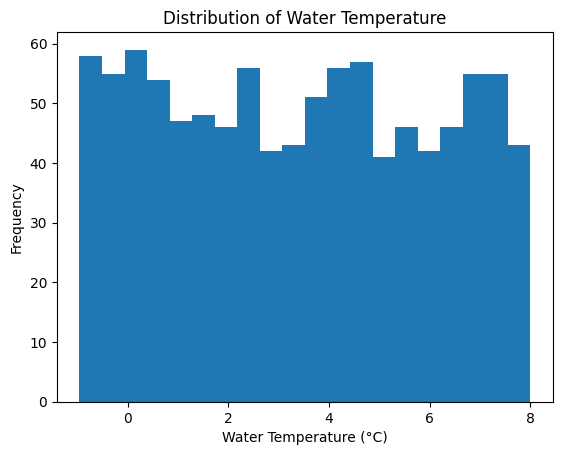

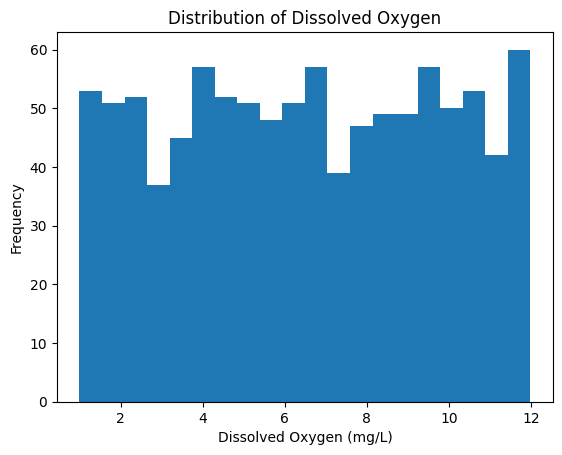

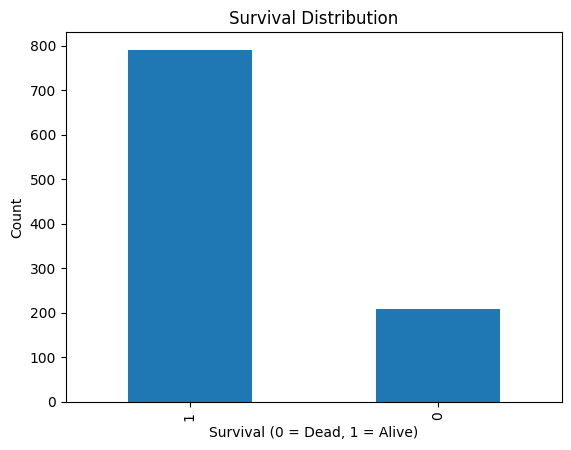

<Figure size 640x480 with 0 Axes>

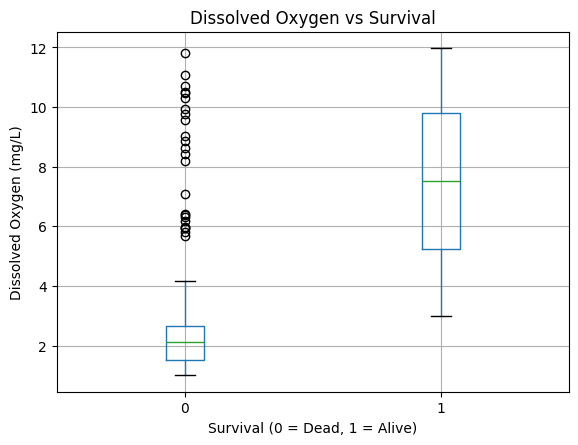

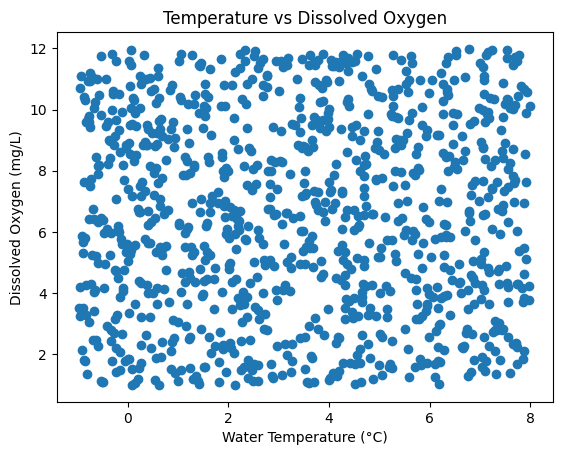


Correlation matrix:
                      water_temperature_c  air_temperature_c  \
water_temperature_c              1.000000           0.029315   
air_temperature_c                0.029315           1.000000   
dissolved_oxygen_mgL             0.014483           0.027252   
pH                              -0.029583          -0.005680   
ice_cover_days                   0.032646          -0.027532   
water_depth_m                    0.036098          -0.001008   
survival                         0.119898          -0.008644   

                      dissolved_oxygen_mgL        pH  ice_cover_days  \
water_temperature_c               0.014483 -0.029583        0.032646   
air_temperature_c                 0.027252 -0.005680       -0.027532   
dissolved_oxygen_mgL              1.000000 -0.013633       -0.020834   
pH                               -0.013633  1.000000       -0.001474   
ice_cover_days                   -0.020834 -0.001474        1.000000   
water_depth_m                    -

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import heatmap

# --------------------

# Load dataset
file_path = "fish_winter_research_dataset_1000_rows.csv"
df = pd.read_csv(file_path)

# --------------------
# Basic exploration
# --------------------
print("First 5 rows:")
print(df.head())

print("\nDataset info:")
print(df.info())

print("\nStatistical summary:")
print(df.describe(include="all"))

print(df.isnull().sum)

# --------------------
# Plot 1: Distribution of Water Temperature
# --------------------
plt.figure()
plt.hist(df["water_temperature_c"], bins=20)
plt.xlabel("Water Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Distribution of Water Temperature")
plt.show()

# --------------------
# Plot 2: Distribution of Dissolved Oxygen
# --------------------
plt.figure()
plt.hist(df["dissolved_oxygen_mgL"], bins=20)
plt.xlabel("Dissolved Oxygen (mg/L)")
plt.ylabel("Frequency")
plt.title("Distribution of Dissolved Oxygen")
plt.show()

# --------------------
# Plot 3: Survival Count
# --------------------
plt.figure()
df["survival"].value_counts().plot(kind="bar")
plt.xlabel("Survival (0 = Dead, 1 = Alive)")
plt.ylabel("Count")
plt.title("Survival Distribution")
plt.show()

# --------------------
# Plot 4: Boxplot (DO vs Survival)
# --------------------
plt.figure()
df.boxplot(column="dissolved_oxygen_mgL", by="survival")
plt.xlabel("Survival (0 = Dead, 1 = Alive)")
plt.ylabel("Dissolved Oxygen (mg/L)")
plt.title("Dissolved Oxygen vs Survival")
plt.suptitle("")
plt.show()

# --------------------
# Plot 5: Scatter (Temperature vs DO)
# --------------------
plt.figure()
plt.scatter(df["water_temperature_c"], df["dissolved_oxygen_mgL"])
plt.xlabel("Water Temperature (°C)")
plt.ylabel("Dissolved Oxygen (mg/L)")
plt.title("Temperature vs Dissolved Oxygen")
plt.show()

# --------------------
# Correlation Matrix (numerical features)
# --------------------
print("\nCorrelation matrix:")
print(df.select_dtypes(include="number").corr())


In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv("fish_winter_research_dataset_1000_rows.csv")

# -----------------------------
# 1. Feature Creation
# -----------------------------

# Stress Index (biologically meaningful)
df["stress_index"] = df["water_temperature_c"] / df["dissolved_oxygen_mgL"]

# Cold stress binary feature
df["cold_stress"] = (df["water_temperature_c"] < 1).astype(int)

# Oxygen risk flag
df["low_oxygen"] = (df["dissolved_oxygen_mgL"] < 4).astype(int)

print("New features added:")
print(df[["stress_index", "cold_stress", "low_oxygen"]].head())


# -----------------------------
# 2. Encode categorical variable (species)
# -----------------------------
le = LabelEncoder()
df["species_encoded"] = le.fit_transform(df["species"])

# Drop original species column
df.drop(columns=["species"], inplace=True)

print("\nSpecies encoding:")
print(dict(zip(le.classes_, le.transform(le.classes_))))


# -----------------------------
# 3. Separate features and target
# -----------------------------
X = df.drop(columns=["survival"])
y = df["survival"]


# -----------------------------
# 4. Feature Scaling
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


# -----------------------------
# 5. Handle Class Imbalance (SMOTE)
# -----------------------------
from collections import Counter
print("\nBefore balancing:", Counter(y))

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

print("After balancing:", Counter(y_balanced))


# -----------------------------
# Final Output
# -----------------------------
print("\nFinal dataset shape:", X_balanced.shape)
print("\nSample of engineered dataset:")
print(X_balanced.head())


New features added:
   stress_index  cold_stress  low_oxygen
0      0.610825            0           1
1      2.032258            0           1
2      0.509572            0           0
3      1.170667            0           1
4      0.100251            1           1

Species encoding:
{'Carp': np.int64(0), 'Mahseer': np.int64(1), 'Snow Trout': np.int64(2), 'Trout': np.int64(3)}

Before balancing: Counter({1: 791, 0: 209})
After balancing: Counter({1: 791, 0: 791})

Final dataset shape: (1582, 10)

Sample of engineered dataset:
   water_temperature_c  air_temperature_c  dissolved_oxygen_mgL        pH  \
0            -0.396662          -1.102573             -0.828122  0.638139   
1             1.578297           0.119816             -0.878189  1.068017   
2             0.828649           1.253180              1.390443 -0.839564   
3             0.372011           0.770388             -0.868801  0.463502   
4            -1.146309           1.025480             -0.793702  0.288864   

   ic

In [ ]:
df

,water_temperature_c,air_temperature_c,dissolved_oxygen_mgL,pH,ice_cover_days,water_depth_m,survival,stress_index,cold_stress,low_oxygen,species_encoded
0,2.37,-11.30,3.88,7.95,105,13.74,1,0.610825,0,1,3
1,7.56,-4.16,3.72,8.27,20,8.80,1,2.032258,0,1,3
2,5.59,2.46,10.97,6.85,63,3.12,1,0.509572,0,0,0
3,4.39,-0.36,3.75,7.82,36,4.40,1,1.170667,0,1,2
4,0.40,1.13,3.99,7.69,26,3.38,1,0.100251,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
995,-0.18,-1.86,10.52,7.35,22,9.87,1,-0.017110,1,0,0
996,7.26,4.13,2.73,7.07,82,7.15,0,2.659341,0,1,1
997,0.23,-13.62,4.41,7.23,24,8.17,1,0.052154,1,0,1
998,7.55,-13.86,4.19,7.58,15,1.00,1,1.801909,0,0,2


Train shape: (1265, 10)
Test shape: (317, 10)

Logistic Regression Accuracy: 0.9653


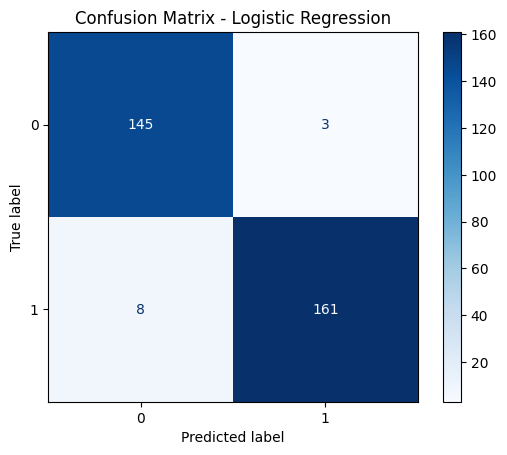


Decision Tree Accuracy: 0.9937


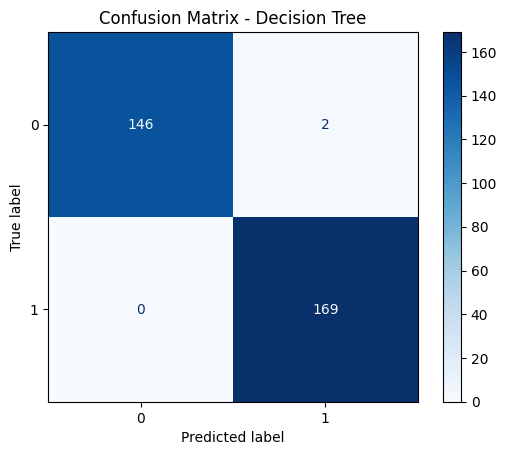


Random Forest Accuracy: 0.9937


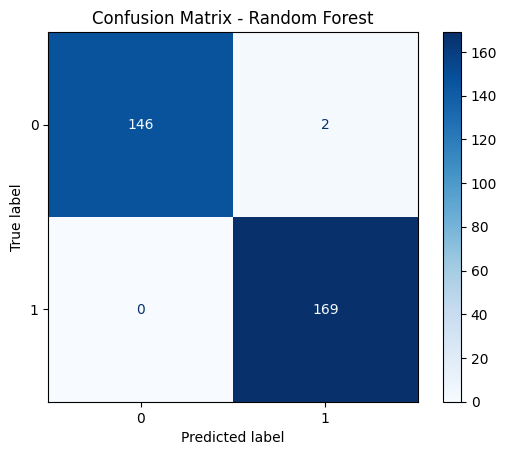


Neural Network (ANN) Accuracy: 0.9842


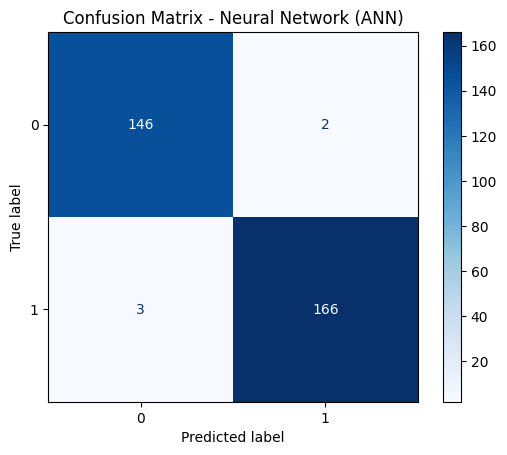

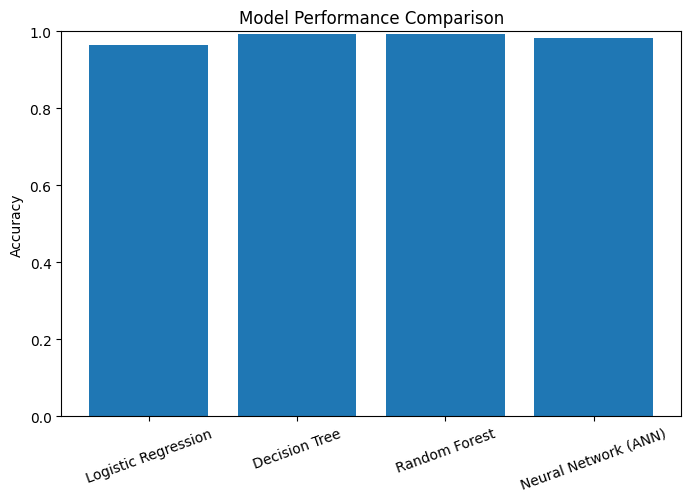

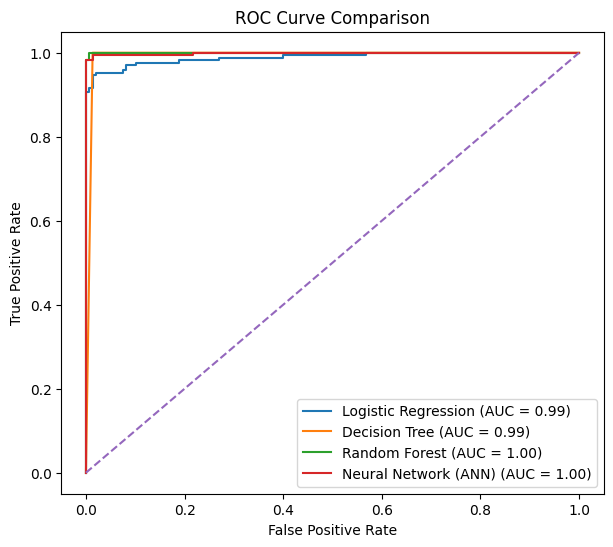

In [ ]:
# -----------------------------
# 6. Train-Test Split
# -----------------------------
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced,
    test_size=0.2,
    random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


# -----------------------------
# 7. Train Models
# -----------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(max_depth=6),
    "Random Forest": RandomForestClassifier(n_estimators=200),
    "Neural Network (ANN)": MLPClassifier(hidden_layer_sizes=(64,32), max_iter=500)
}


# -----------------------------
# 8. Evaluation + Visualization
# -----------------------------
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

accuracy_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = acc

    print(f"\n{name} Accuracy: {acc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.grid(False)
    plt.show()


# -----------------------------
# 9. Accuracy Comparison Plot
# -----------------------------
plt.figure(figsize=(8,5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values())
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.title("Model Performance Comparison")
plt.xticks(rotation=20)
plt.show()


# -----------------------------
# 10. ROC Curve Comparison
# -----------------------------
plt.figure(figsize=(7,6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


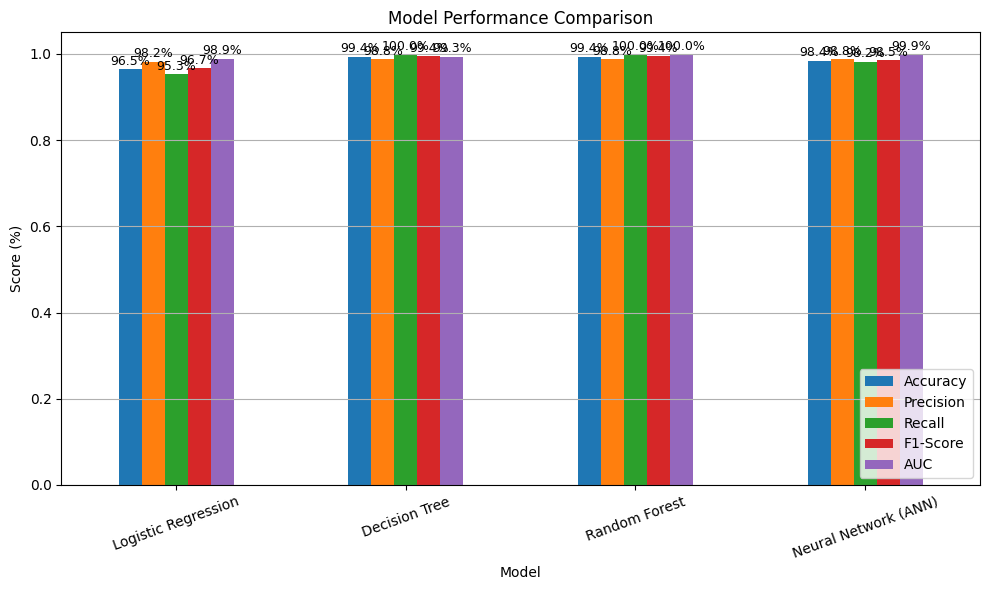

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set model as index
plot_df = results_df.set_index("Model")

# Plot
ax = plot_df.plot(kind="bar", figsize=(10,6))

plt.title("Model Performance Comparison")
plt.ylabel("Score (%)")
plt.ylim(0, 1.05)
plt.xticks(rotation=20)
plt.legend(loc="lower right")
plt.grid(axis="y")

# Add percentage labels on bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height + 0.01,
            f"{height*100:.1f}%",
            ha="center",
            fontsize=9
        )

plt.tight_layout()
plt.show()

